<a href="https://colab.research.google.com/github/RenuMaan/hobby_projects/blob/main/MI_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mycardial infraction outcome classifiction using neural netowrk
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import keras
from keras import Sequential
from keras import layers


In [2]:
data = pd.read_csv("Myocardial infarction complications.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [3]:
data.isnull().sum().values

array([   0,    8,    0,    4,  106,   73,   51, 1628,    9,    8,  248,
         54,   21,   21,   21,   21,   21,   21,   21,   18,   18,   18,
         18,   18,   18,   18,   11,   10,   10,    7,    7,    7,    7,
          7, 1076, 1076,  267,  267,   12,   15,   14,   12,   12,   12,
         83,   80,   80,   72,    1,  152,  152,  152,  152,  152,  152,
        115,  115,  115,  115,  115,  115,  115,  115,  115,  115,  115,
        115,  115,  115,  115,  115,  115,  115,  115,  115,   10,   10,
         10,   10,   10,   10,   10,  369,  371,  375,  375,  284,  285,
       1696,  125,  203,  126,   16,  108,  128,  657,  686,  677,    9,
          5,  108,  131,   10,  110,  131,   10,   11,   13,   17,   17,
         16,   16,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [4]:
data.drop([col for col in data.columns if data[col].isnull().sum()>1000], axis = 1, inplace = True)

In [5]:
print(data.shape)
print(data.columns)

(1700, 120)
Index(['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'GB', 'SIM_GIPERT', 'DLIT_AG',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=120)


In [6]:
import missingno as msno
from collections import Counter
l_out = list(range(0,8))
for outcome in l_out:
    for col in data.columns:
        if data[col].isnull().sum()>0:
            most_freq = Counter(data.loc[data["LET_IS"]==outcome, [col]][col].values).most_common()[0][0]
            data[col].fillna(most_freq, inplace=True)
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
data.drop("ID", axis =1, inplace = True)

In [8]:
data.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.rename(columns={'INF_ANAM':'mi_num','STENOK_AN':'ch_pain','FK_STENOK':'grade_ch_pain',
                    'IBS_POST':'heart_disease_history','IBS_NASL':'family_history','GB':'high_BP','SIM_GIPERT':'BP_above_180',
                    'DLIT_AG':'his_of_hbp','S_AD_KBRIG':'sys_BP_ET','D_AD_KBRIG':'dia_BP_ET',
                     'S_AD_ORIT':'sys_BP_ICU','D_AD_ORIT':'dia_BP_ICU','ZSN_A':'CHF_history',"AGE":"age", "SEX":'sex',
                    'ritm_ecg_p_01': 'rytm_sinus_normal','ritm_ecg_p_02':'rytm_atr_fibr','ritm_ecg_p_04':'rytm_atrial',
                     'ritm_ecg_p_06': 'rytm_idioventricular','ritm_ecg_p_07': 'rythm_sinus_above_90',
                     'ritm_ecg_p_08': 'rytm_sinus_below_60','SVT_POST':'type_heart_rytm','MP_TP_POST':'atr_rytm_irrgularity',
                     'FIB_G_POST': 'vent_rytm_irregularity','GT_POST':'rapid_rytm_upper_chamber',
                     'K_SH_POST':'cardiogenic_shock',
                    'ant_im':'anterior_MI_LV','post_im':'posterior_MI_LV', 'lat_im':'lateral_MI_LV',
                     'inf_im': 'inferior_MI_LV', 'IM_PG_P':'RV_MI','O_L_POST':'edema_ICU',
                     'fibr_ter_01':'drug1_750k','fibr_ter_02': 'drug1_1k','fibr_ter_03':'drug1_3m','fibr_ter_05':'drug2',
                      'fibr_ter_06':'drug2_500k','fibr_ter_07': 'drug1_250k','fibr_ter_08':'drug2_1.5m',
                    'GIPO_K': 'low_K', 'K_BLOOD':'K_value','GIPER_NA':'high_Na','NA_BLOOD':'Na_value',
                       'ALT_BLOOD':'ALT_level','AST_BLOOD': 'AST_level','KFK_BLOOD':'CPK_level','L_BLOOD':'wbc_count',
                       'ROE': 'ESR','R_AB_1_n':'pain_relapse_1hr','R_AB_2_n':'pain_relapse_2day',
                       'R_AB_3_n':'pain_relapse_3day',
                     'REC_IM':'mi_relapse','RAZRIV':'myocar_rupture','A_V_BLOK':'III_av_block',
                    'OTEK_LANC':'edema','FIBR_PREDS':'art_fib','FIBR_JELUD':'ven_fib','PREDS_TAH':'SPV_tach',
                   'JELUD_TAH':'ven_tach', 'ZSN':'CHF','LET_IS':'lethal_outcome',
                    'TRENT_S_n':'blood_thinner','GEPAR_S_n':'anticoagulants','TIKL_S_n':'platelet_agg_inhib',
                     'ASP_S_n':'pain_killer1','ANT_CA_S_n':'Ca_blocker','B_BLOK_S_n':'beta_blocker',
                     'LID_S_n':'local_anesthesia_ICU','LID_KB':'local_anesthesia_ET','NITR_S':'lq_nitrates',
                     'NA_KB':'opioid_ET','NA_R_1_n':'opioid_1st_hr','NA_R_2_n':'opioid_2nd_day','NA_R_3_n':'opioid_3rd_day',
                     'NOT_NA_KB':'NSAIDS_ET','NOT_NA_1_n':'NSAIDS_1st_hr','NOT_NA_2_n':'NSAIDS_2nd_day',
                     'NOT_NA_3_n':'NSAIDS_3rd_day',
                    'endocr_01':'diabetes_mellitus','endocr_02':'obesity','endocr_03':'thyrotoxicosis',
                     'zab_leg_01':'chronic_bronchitis','zab_leg_02':'obstructive_chronic_bronchitis','zab_leg_03':'bronchial_asthma',
                     'zab_leg_04':'chronic_pneumonia ', 'zab_leg_06':'pulmonary_tuberculosis'}, inplace = True)


In [10]:
from sklearn.feature_selection import chi2
df = data.drop("lethal_outcome", axis = 1)
Target = data[["lethal_outcome"]]
chi_scores = chi2(df,Target)
p_value = pd.Series((chi_scores[1]),index = df.columns)
cat_col_sel = []
for col in p_value.index:
  if p_value[col]>0.05:
    cat_col_sel.append(col)
print(len(cat_col_sel))

58


In [11]:
# heatmap with a hover cursur with the remaing columns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import plotly.express as px
import plotly.graph_objects as go
plt.figure(figsize = (14,14))
fig = px.imshow(df.corr())
fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    showlegend = False,
    width = 1200, height = 1200,
    autosize = False )
fig.show()

<Figure size 1400x1400 with 0 Axes>

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
Y = np.array(Target)
rfe_method = RFE(LogisticRegression(max_iter=5000),
                 n_features_to_select=20, step=20)
rfe_method.fit(np.array(df), Y)
df.columns[(rfe_method.get_support())]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/valida

Index(['sex', 'nr_11', 'obstructive_chronic_bronchitis', 'cardiogenic_shock',
       'RV_MI', 'rytm_atr_fibr', 'n_r_ecg_p_05', 'n_p_ecg_p_03',
       'n_p_ecg_p_12', 'AST_level', 'NSAIDS_ET', 'lq_nitrates', 'pain_killer1',
       'SPV_tach', 'ven_fib', 'edema', 'myocar_rupture', 'CHF', 'mi_relapse',
       'P_IM_STEN'],
      dtype='object')

In [31]:
from keras.utils import to_categorical
X = df[['sex', 'nr_11', 'obstructive_chronic_bronchitis', 'cardiogenic_shock',
       'RV_MI', 'rytm_atr_fibr', 'n_r_ecg_p_05', 'n_p_ecg_p_03',
       'n_p_ecg_p_12', 'AST_level', 'NSAIDS_ET', 'lq_nitrates', 'pain_killer1',
       'SPV_tach', 'ven_fib', 'edema', 'myocar_rupture', 'CHF', 'mi_relapse',
       'P_IM_STEN']]
Y = data[["lethal_outcome"]]
Y = to_categorical(Y)
Y.shape

(1700, 8)

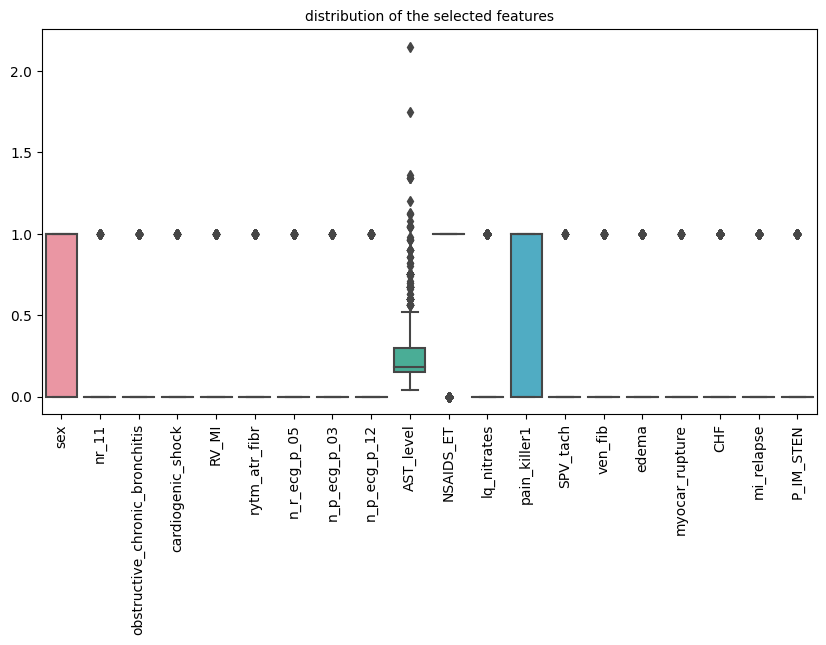

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X)
plt.xticks(rotation=90,fontsize=10)
plt.title('distribution of the selected features',fontsize=10)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_train1, x_test, y_train1, y_test = train_test_split(X, Y, test_size=0.35,stratify=Y, random_state=42)
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)
y_train.shape

(7432, 8)

In [33]:
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(50, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=100, verbose=0)

Train: 0.925, Test: 0.755


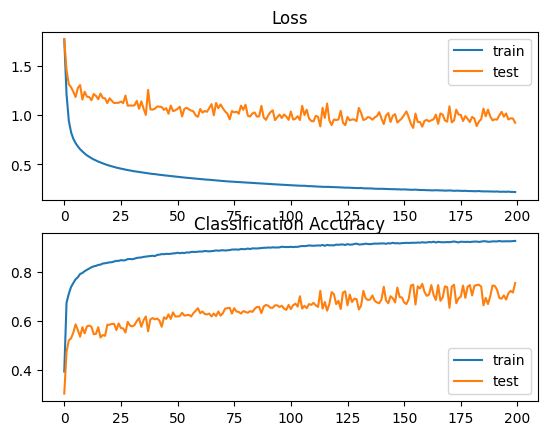

In [34]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Classification Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()